In [30]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

width = 12
height = 7
plt.rcParams["figure.figsize"] = (width, height)

import graphviz
import pandas as pd
import numpy as np
import tflscripts
import pickle

configuration = tflscripts.read_configuration()
df = pd.read_pickle('results.p')

df = df.loc[df.f1 >= 0.5]

df = df.sort_values(by='f1', ascending=False)
df = df.drop_duplicates(['source_dataset', 'target_dataset', 'source_device', 'target_device', 'label'], keep='first')

df['space_transfer'] = df['source_room'] + ' – ' + df['target_room']
df_mites = df.loc[(df['source_device_type'] == 'Mite') & (df['target_device_type'] == 'Mite')]

df_without_transfer = df.loc[df.type_of_transfer == 'No transfer']
df_transfer = df.loc[df.type_of_transfer != 'No transfer']

df_without_transfer_mites = df_mites.loc[df_mites.type_of_transfer == 'No transfer']
df_transfer_mites = df_mites.loc[df_mites.type_of_transfer != 'No transfer']

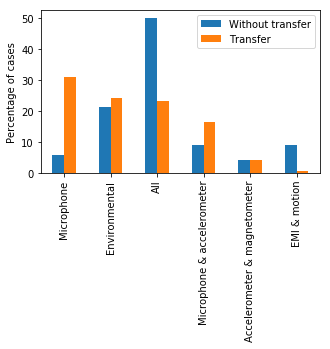

In [34]:
plt.rcParams["figure.figsize"] = (5, 3)

features = pd.concat([
    df_without_transfer.features_name.value_counts() / len(df_without_transfer) * 100,
    df_transfer.features_name.value_counts() / len(df_transfer) * 100
], axis=1)
features.columns = ['Without transfer', 'Transfer']
features = features.sort_values(by='Transfer', ascending=False)
features.plot.bar()
plt.ylabel('Percentage of cases')

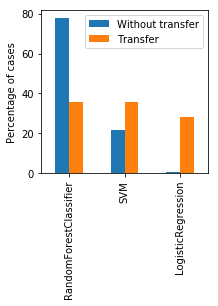

In [33]:
plt.rcParams["figure.figsize"] = (3, 3)

classifiers = pd.concat([
    df_without_transfer.classifier.value_counts() / len(df_without_transfer) * 100,
    df_transfer.classifier.value_counts() / len(df_transfer) * 100
], axis=1)
classifiers.columns = ['Without transfer', 'Transfer']
classifiers = classifiers.sort_values(by='Transfer', ascending=False)
classifiers.plot.bar()
plt.ylabel('Percentage of cases')